## Постановка задачи

Задача состоит в кластеризации синтетических данных о клиентах условного мазазина, оформление подразумевает лишь визуализацию и код (отсутствие комментариев), выбор инструментария свободный.

## Import data & libraries

In [0]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import manifold
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv(r'https://drive.google.com/uc?export=download&id=1FxHcLCo-3SX5iPrUR2GbTKVxhuOWKbD8', index_col='CustomerID')
print(df.shape)
df.head()

(200, 4)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## Data analysis

In [3]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.Gender = df.Gender.map({'Male': 1, 'Female': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Gender                    200 non-null int64
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4)
memory usage: 7.8 KB


In [5]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


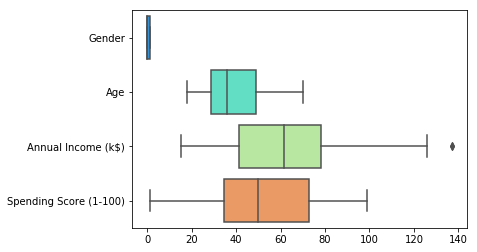

In [6]:
sns.boxplot(data=df, palette='rainbow', orient='h');

In [7]:
df[df['Annual Income (k$)'] > 120]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
197,0,45,126,28
198,1,32,126,74
199,1,32,137,18
200,1,30,137,83


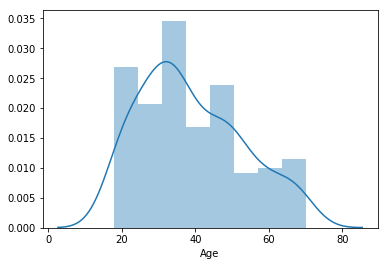

In [8]:
sns.distplot(df['Age'])

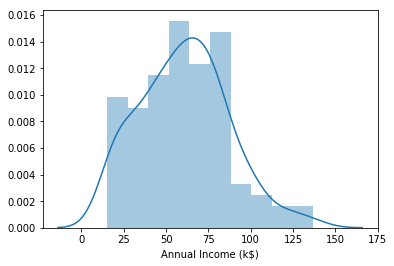

In [9]:
sns.distplot(df['Annual Income (k$)'])

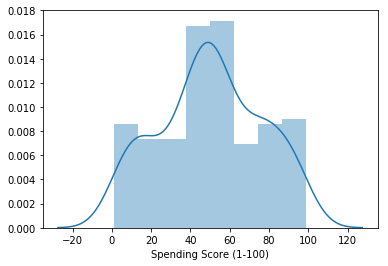

In [10]:
sns.distplot(df['Spending Score (1-100)'])

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


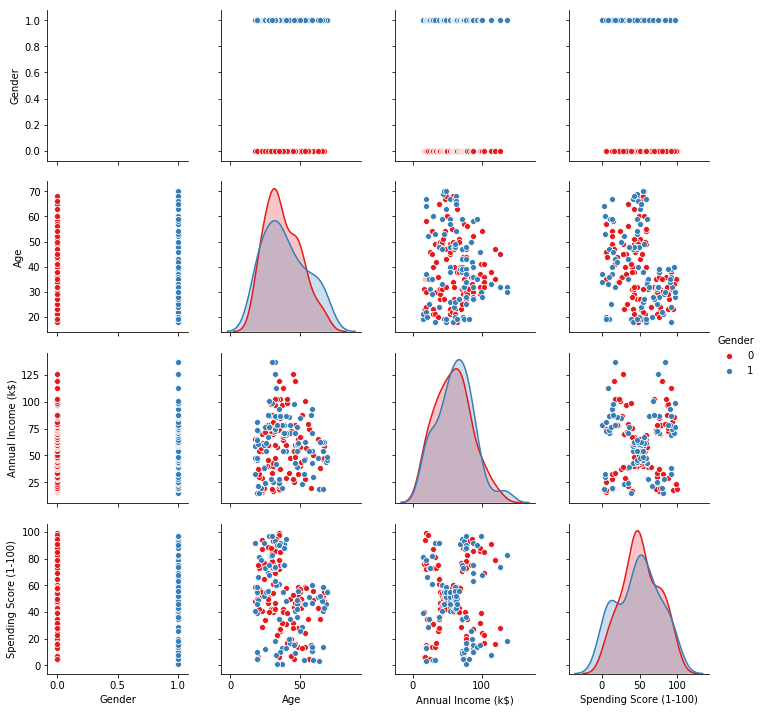

In [11]:
sns.pairplot(df, hue='Gender', palette='Set1')

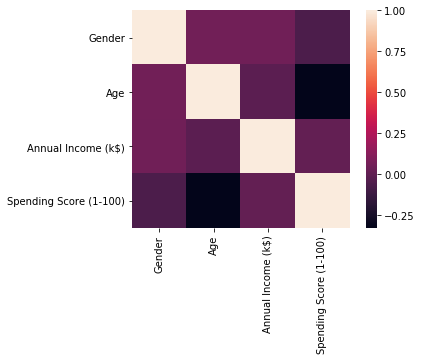

In [12]:
sns.heatmap(df.corr(), square=True)

## Feature engineering

In [13]:
df['age_gradation'] = df['Age'].apply(
    lambda x: 0 if x <= 30 else 1 if x <= 40 else 2
    )
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),age_gradation
CustomerID,,,,,
1,1,19,15,39,0
2,1,21,15,81,0
3,0,20,16,6,0
4,0,23,16,77,0
5,0,31,17,40,1


In [14]:
df['age_gradation'].value_counts()

2    78
0    62
1    60
Name: age_gradation, dtype: int64

In [15]:
df['social_level'] = df['Annual Income (k$)'].apply(
    lambda x: 0 if x <= 50 else 1 if x <= 70 else 2
    )
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),age_gradation,social_level
CustomerID,,,,,,
1,1,19,15,39,0,0
2,1,21,15,81,0,0
3,0,20,16,6,0,0
4,0,23,16,77,0,0
5,0,31,17,40,1,0


In [16]:
df['social_level'].value_counts()

2    74
0    74
1    52
Name: social_level, dtype: int64

In [17]:
df['sсore_type'] = df['Spending Score (1-100)'].apply(
    lambda x: 0 if x <= 40 else 1 if x <= 60 else 2
    )
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),age_gradation,social_level,sсore_type
CustomerID,,,,,,,
1,1,19,15,39,0,0,0
2,1,21,15,81,0,0,2
3,0,20,16,6,0,0,0
4,0,23,16,77,0,0,2
5,0,31,17,40,1,0,0


In [18]:
df['sсore_type'].value_counts()

1    75
0    63
2    62
Name: sсore_type, dtype: int64

## Modeling

In [19]:
model = KMeans(random_state=42, n_clusters=6)
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [20]:
labels = model.labels_
print(labels)

[5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5
 2 5 2 1 2 1 4 5 2 1 4 4 4 1 4 4 1 1 1 1 1 4 1 1 4 1 1 1 4 1 1 4 4 1 1 1 1
 1 4 1 4 4 1 1 4 1 1 4 1 1 4 4 1 1 4 1 4 4 4 1 4 1 4 4 1 1 4 1 4 1 1 1 1 1
 4 4 4 4 4 1 1 1 1 4 4 4 0 4 0 3 0 3 0 3 0 4 0 3 0 3 0 3 0 3 0 4 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [0]:
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 42)
df2D = tsne.fit_transform(df)

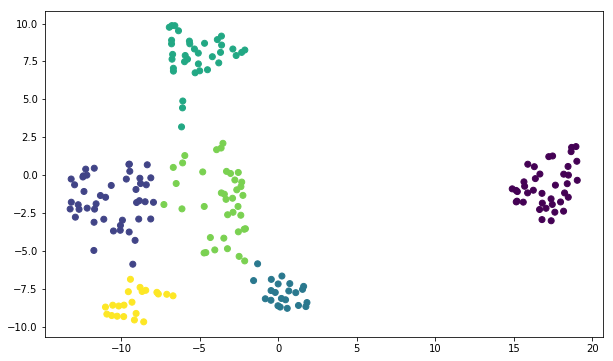

In [22]:
plt.figure(figsize = (10, 6))
plt.scatter(df2D[:, 0], df2D[:, 1], c=labels)

In [23]:
df['Cluster'] = labels
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),age_gradation,social_level,sсore_type,Cluster
CustomerID,,,,,,,,
1,1,19,15,39,0,0,0,5
2,1,21,15,81,0,0,2,2
3,0,20,16,6,0,0,0,5
4,0,23,16,77,0,0,2,2
5,0,31,17,40,1,0,0,5


In [24]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(df.drop('Cluster', axis=1), df['Cluster'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [25]:
feature_importances = list(zip(tree.feature_importances_, df.columns))
feature_importances.sort(reverse=True)
feature_importances

[(0.3238199942399578, 'Spending Score (1-100)'),
 (0.2629510552096377, 'Annual Income (k$)'),
 (0.201244567942947, 'social_level'),
 (0.19178851031176783, 'Age'),
 (0.011066231394898467, 'sсore_type'),
 (0.009129640900791235, 'age_gradation'),
 (0.0, 'Gender')]

In [26]:
best_features = [ name[1] for name in feature_importances[:4]]
best_features

['Spending Score (1-100)', 'Annual Income (k$)', 'social_level', 'Age']

In [27]:
total = df.groupby('Cluster').agg(np.mean)
total[best_features]

,Spending Score (1-100),Annual Income (k$),social_level,Age
Cluster,,,,
0,82.128205,86.538462,1.948718,32.692308
1,49.088889,53.377778,0.555556,56.155556
2,79.363636,25.727273,0.000000,25.272727
3,17.285714,88.228571,2.000000,41.685714
4,49.131579,56.657895,0.763158,27.000000
5,19.523810,25.142857,0.000000,44.142857


In [0]:
def draw_cluster(n):
  stats=total.loc[n, best_features].values

  # Make some calculations for the plot
  angles=np.linspace(0, 2*np.pi, len(best_features), endpoint=False)
  stats=np.concatenate((stats,[stats[0]]))
  angles=np.concatenate((angles,[angles[0]]))

  # Plot stuff
  fig = plt.figure()
  ax = fig.add_subplot(111, polar=True)
  ax.plot(angles, stats, 'o-', linewidth=2)
  ax.fill(angles, stats, alpha=0.25)
  ax.set_thetagrids(angles * 180/np.pi, best_features)
  ax.grid(True)

  plt.show()

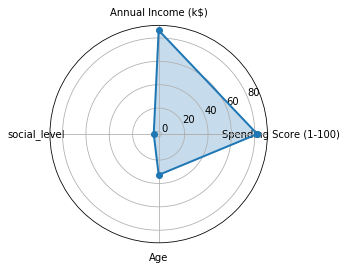

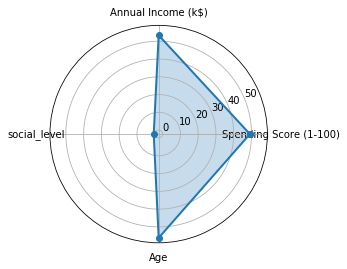

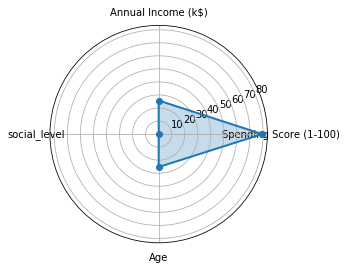

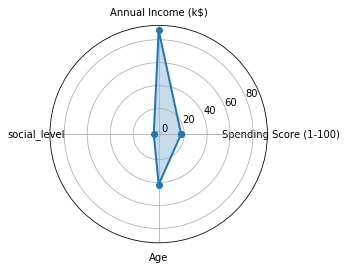

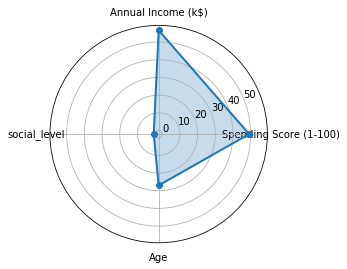

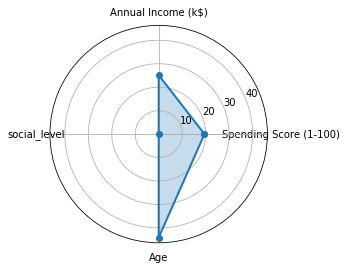

In [29]:
for n in total.index:
  draw_cluster(n)